<a href="https://colab.research.google.com/github/TrishKedi/AI-Coursework/blob/main/ML10_Code05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.2286 - loss: 1.0017 - val_accuracy: 0.2667 - val_loss: 0.9946
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1357 - loss: 0.9855 - val_accuracy: 0.2000 - val_loss: 0.9515
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3924 - loss: 0.9276 - val_accuracy: 0.5333 - val_loss: 0.9150
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5208 - loss: 0.8926 - val_accuracy: 0.4667 - val_loss: 0.8851
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4672 - loss: 0.8670 - val_accuracy: 0.5667 - val_loss: 0.8561
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4966 - loss: 0.8522 - val_accuracy: 0.5667 - val_loss: 0.8279
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5271 - loss: 0.8102 - val_accuracy: 0.4667 - val_loss: 0.8043
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5467 - loss: 0.7703 - val_accuracy: 0.4667 - val_loss: 0.7838
Ep

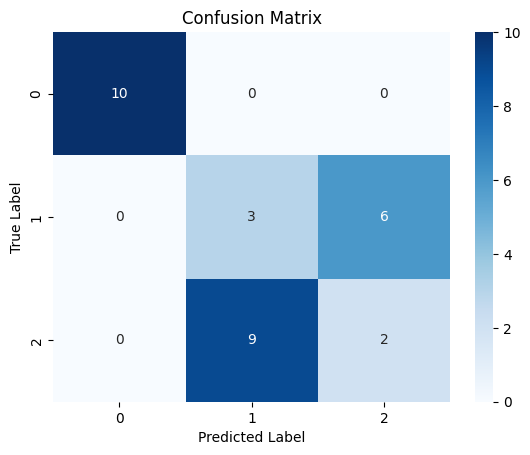

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# One-hot encode the target labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a neural network model
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model and capture the history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)

# Make predictions on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Convert one-hot encoded y_test back to labels
y_test_labels = y_test.argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_labels, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()
